### **Imports**

In [37]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.sparse import random
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
import shapely 

### **Base**

In [38]:
dfFull=pd.read_csv('properatti.csv')

### **0. Descripcion general**

In [39]:
dfFull.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [40]:
dfFull.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [41]:
dfFull.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [42]:
#Dropeamos columna 'Unnamed' porque repite axis 
dfFull = dfFull.drop(['Unnamed: 0'], axis=1)

### **1. Limpieza de datos**

   #### **Valores duplicados, nulos y outliers**

In [43]:
#Nulos por columna 
dfFull.isnull().sum() 

operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

**- state_name: valores nulos**

In [44]:
dfCapi = dfFull[dfFull['state_name'] == 'Capital Federal']
dfOtro = dfFull[dfFull['state_name'] != 'Capital Federal']

In [45]:
#Nulos Capi por columna
NulosCapi = round(((dfCapi.isnull().sum() / dfCapi.isnull().count())*100),0).reset_index()
NulosCapi.columns = ['columna', 'porcentaje_nulos']
NulosCapi['Tag'] = 'CABA'

In [46]:
#Nulos Otro por columna
NulosOtro = round(((dfOtro.isnull().sum() / dfOtro.isnull().count())*100),0).reset_index()
NulosOtro.columns = ['columna', 'porcentaje_nulos']
NulosOtro['Tag'] = 'Otros'

In [47]:
#Unimos NulosCapi y NulosOtro y nos quedasmo con las columnas que tengan al menos un valor nulo
NulosCross = pd.concat([NulosCapi,NulosOtro],axis=0)
NulosCross_SoloNulos = NulosCross[(NulosCross['porcentaje_nulos'] > 0)]

In [48]:
NulosCross_SoloNulos

,columna,porcentaje_nulos,Tag
6,geonames_id,4.0,CABA
7,lat-lon,26.0,CABA
8,lat,26.0,CABA
9,lon,26.0,CABA
10,price,10.0,CABA
11,currency,10.0,CABA
12,price_aprox_local_currency,10.0,CABA
13,price_aprox_usd,10.0,CABA
14,surface_total_in_m2,18.0,CABA
15,surface_covered_in_m2,7.0,CABA


In [49]:
#Graficamos % de nulos por columna para CABA vs resto
fig = px.bar(data_frame = NulosCross_SoloNulos, x = "columna", y = "porcentaje_nulos", 
             color = "Tag",
             color_discrete_map={'CABA': 'lightseagreen','Otros': 'gray'},
             barmode='group',
             title="Porcentaje de nulos por variable - CABA vs Otros",
             width=800, height=400)

fig.show()

**Como CABA tiene menos valores nulos que el resto de las regiones nos vamos a quedar con CABA para el resto del análisis**

**Elimación de duplicados**

In [50]:
#Eliminar duplicados
dfCapi.drop_duplicates(subset=["price_aprox_usd","description","place_name"], inplace=True)

C:\Users\ARIEL~1.DAP\AppData\Local\Temp/ipykernel_15864/889814540.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**- Correlaciones entre variables**

Se ve una relación entre superficie y precio total. Después obviamente hay relación entre las variables de precio (precio en pesos y precio en usd) y entre las variables de superficie (surface covered y surface total) dado que deberian ser similares - ej si aumenta surface covered, tambien surface total

In [51]:
corr = dfCapi.corr()

In [52]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
geonames_id,1.00,-0.04,0.12,-0.04,-0.04,-0.04,-0.00,-0.00,-0.05,-0.01,-0.02,0.02,-0.00
lat,-0.04,1.00,0.40,0.07,0.07,0.07,-0.01,-0.00,0.08,0.01,0.05,0.00,-0.03
lon,0.12,0.40,1.00,0.05,0.09,0.09,0.01,0.01,0.09,-0.00,-0.03,0.03,-0.04
price,-0.04,0.07,0.05,1.00,0.54,0.54,0.37,0.04,0.16,0.42,0.07,0.17,0.01
price_aprox_local_currency,-0.04,0.07,0.09,0.54,1.00,1.00,0.69,0.09,0.29,0.08,0.05,0.25,0.01
price_aprox_usd,-0.04,0.07,0.09,0.54,1.00,1.00,0.69,0.09,0.29,0.08,0.05,0.25,0.01
surface_total_in_m2,-0.00,-0.01,0.01,0.37,0.69,0.69,1.00,0.87,-0.02,-0.04,-0.01,0.03,0.00
surface_covered_in_m2,-0.00,-0.00,0.01,0.04,0.09,0.09,0.87,1.00,-0.06,-0.01,-0.00,0.30,0.00
price_usd_per_m2,-0.05,0.08,0.09,0.16,0.29,0.29,-0.02,-0.06,1.00,0.23,0.09,-0.18,0.02
price_per_m2,-0.01,0.01,-0.00,0.42,0.08,0.08,-0.04,-0.01,0.23,1.00,0.00,-0.04,0.00


C:\Users\ARIEL~1.DAP\AppData\Local\Temp/ipykernel_15864/387532550.py:3: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



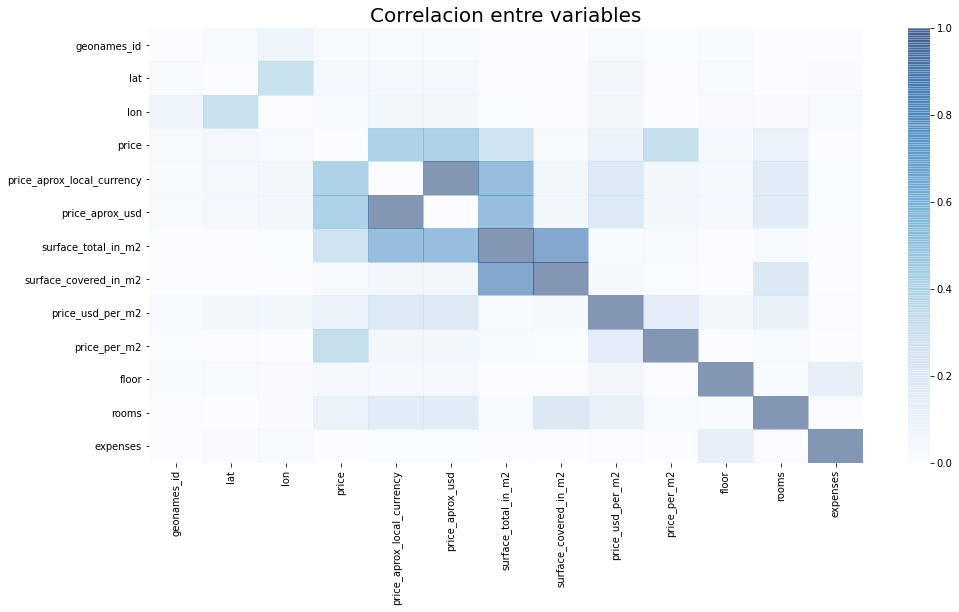

In [53]:
fig, ax = plt.subplots(figsize=(16,8))       
cor = dfCapi.corr().abs()
cor.values[[np.arange(6)]*2] = 0
ax = plt.axes()
sns.heatmap(cor,cmap='Blues', alpha=0.5,ax=ax);
ax.set_title('Correlacion entre variables', fontsize=20)
plt.show();

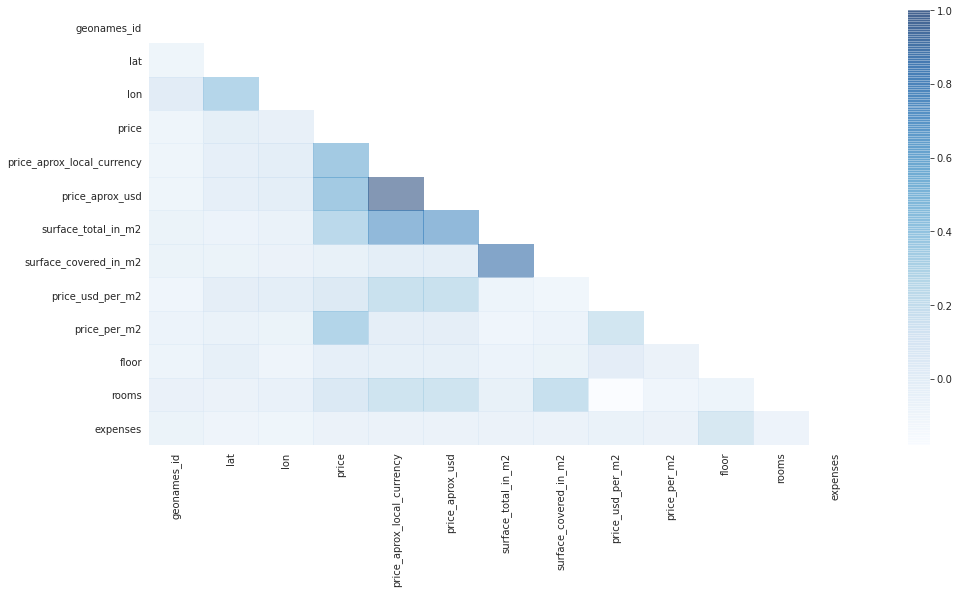

In [54]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 8))
    ax = sns.heatmap(corr, cmap = "Blues", alpha=0.5, mask=mask)

Nos vamos a focalizar en limpiar (outliers) y completar (nulos) variables como Rooms, Superficie

**- Valores nulos para CABA**

In [55]:
#Funcion para graficar el porcentaje de valores nulos

def porcentajes_nulos(df, h=800):
    per_cant_null = (df.isnull().sum() / df.shape[0]).sort_values()
    
    fig = px.bar(per_cant_null, x=per_cant_null.values, y=per_cant_null.index, 
                 height=h, 
                 color_discrete_sequence =['lightseagreen']*len(df),
                 orientation="h", 
                 title="Cantidad de valores nulos por campo",
                 labels={
                     "x": "Porcentaje (%)",
                     "index": "Campo",
                 })    
    fig.show()

In [56]:
porcentajes_nulos(dfCapi)

Floor y expenses tiene casi la totalidad de valores nulos (candidatos a no utilizarse)


Rooms tiene el 50% de datos nulos pero quizás lo podemos completar con con el campo 'description' y completandolo con la info de los registros que sí tienen el dato (ej con la media)


**- Columnas de precio: precio vs precio en usd**

In [57]:
#Chequeo si la columna precio se corresponde con la columna del precio en dolar
serie = dfCapi["price"] / dfCapi["price_aprox_usd"]
serie.round(2).value_counts()
#Y hay correspondencia así que que estos datos no hay que convertirlos

1.00     26639
17.83     1085
17.14       24
17.63        5
3.24         2
dtype: int64

**- Rooms:** Completamos esta columna con description

In [58]:
#REGEX para rooms

patron = "(?P<cant_rooms>\d+)(\s?)(amb)"
regex = re.compile(patron, flags=re.IGNORECASE)
dfCapi.loc[:,"rooms_reg"] = dfCapi.rooms
dfCapi.loc[:,"rooms_reg"] = dfCapi.apply(lambda x: np.int(regex.search(x.description).group("cant_rooms"))
                                         if ((regex.search(x.description) != None) & (np.isnan(x.rooms_reg)))
                                         else x.rooms_reg, axis=1)

patron = "(?P<cant_rooms>un|mono|dos|tres|cuatro)(-?)(\s?)(amb)"
regex = re.compile(patron, flags=re.IGNORECASE)
dfCapi.loc[:,"rooms_reg"] = dfCapi.apply(lambda x: regex.search(x.description).group("cant_rooms").lower() 
                                         if ((regex.search(x.description) != None) & (np.isnan(x.rooms_reg))) 
                                         else x.rooms_reg, axis=1)
dfCapi["rooms_reg"].replace({"un":1, "mono":1, "dos": 2, "tres": 3, "cuatro":4}, inplace=True)


C:\Users\ariel.dapia\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ariel.dapia\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ariel.dapia\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\series.py:4576: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

In [59]:
dfRooms = dfCapi.loc[:,['rooms','rooms_reg']]
porcentajes_nulos(dfRooms,400)

**- Barrios:**
algunos tienen place_name = 'Capital Federal'. Los tratamos de reemplzar con la descripción y lat-lon

Hicimos un grafico de burbujas con superficie y m2 por barrio y vimos que habían varias propiedades con place_name = Capital Federal

In [60]:
Burbujas = dfCapi.groupby(['place_name']).aggregate({'place_name':'count', 'surface_total_in_m2':'mean','price_usd_per_m2':'mean'})

In [61]:
Burbujas = Burbujas.rename(columns={'place_name':'Count'})

In [62]:
dfBub = pd.DataFrame(Burbujas)
dfBub.reset_index(inplace=True)
dfBub

,place_name,Count,surface_total_in_m2,price_usd_per_m2
0,Abasto,100,95.047619,2048.205347
1,Agronomía,40,102.592593,2065.200228
2,Almagro,1056,79.348264,2762.905303
3,Balvanera,642,98.407098,1956.755333
4,Barracas,406,117.833333,1978.223779
...,...,...,...,...
57,Villa Riachuelo,6,226.000000,1110.690766
58,Villa Santa Rita,56,129.423077,1871.349906
59,Villa Soldati,14,3313.666667,736.929399
60,Villa Urquiza,1415,72.777388,2501.582595


In [63]:
fig = px.scatter(data_frame = dfBub, x = "surface_total_in_m2", y = "price_usd_per_m2",
                 size = "Count", color = "place_name", opacity = 0.6,
                 hover_name="place_name", width=700, height=700)

fig.update_xaxes(rangeslider_visible=True)

fig.show()

El tamaño de las burbujas representa la cantidad de propiedades. Es interesante ver cómo Puerto Madero y Palermo Chico estan bien alejadas del resto de los barrios, con alta superficie y costo por m2

Ahora vamos a reemplazar los casos con place_name = 'Capital Federal' a partir de la latitud y longitud de las propiedades. Vamos a utilizar un csv que contiene info geografica de cada barrio ('https://raw.githubusercontent.com/francodegio/DigitalHouse/master/barrios.csv')


In [64]:
#Lista de barrios
place = np.sort(dfCapi.place_name.unique())
print(place) #Llama la atencion el barrio Capital Federal y otros barrios no formales
print("\n")

#Me fijo si para los casos de place_name = capital federal, podria usar el campo place with parents 
print(dfCapi[dfCapi["place_name"] == "Capital Federal"]['place_with_parent_names'].value_counts())
print("\n")
#La respuesta es NO.

['Abasto' 'Agronomía' 'Almagro' 'Balvanera' 'Barracas' 'Barrio Norte'
 'Belgrano' 'Boca' 'Boedo' 'Caballito' 'Capital Federal' 'Catalinas'
 'Centro / Microcentro' 'Chacarita' 'Coghlan' 'Colegiales' 'Congreso'
 'Constitución' 'Flores' 'Floresta' 'Las Cañitas' 'Liniers' 'Mataderos'
 'Monserrat' 'Monte Castro' 'Nuñez' 'Once' 'Palermo' 'Palermo Chico'
 'Palermo Hollywood' 'Palermo Soho' 'Palermo Viejo' 'Parque Avellaneda'
 'Parque Centenario' 'Parque Chacabuco' 'Parque Chas' 'Parque Patricios'
 'Paternal' 'Pompeya' 'Puerto Madero' 'Recoleta' 'Retiro' 'Saavedra'
 'San Cristobal' 'San Nicolás' 'San Telmo' 'Tribunales' 'Velez Sarsfield'
 'Versalles' 'Villa Crespo' 'Villa Devoto' 'Villa General Mitre'
 'Villa Lugano' 'Villa Luro' 'Villa Ortuzar' 'Villa Pueyrredón'
 'Villa Real' 'Villa Riachuelo' 'Villa Santa Rita' 'Villa Soldati'
 'Villa Urquiza' 'Villa del Parque']


|Argentina|Capital Federal|    1013
Name: place_with_parent_names, dtype: int64




In [65]:
#Para una proporcion de ellos podriamos usar las coordenadas
print(dfCapi[dfCapi["place_name"] == "Capital Federal"]['lat-lon'].notnull().sum())

345


In [66]:
# Creamos GeoDataframes que nos permitan analizar dentro que poligono (barrio) se encuentran las propiedades 
#con place name = "Capital Federal", a partir de los campos Lat y Lon
barrios=pd.read_csv('https://raw.githubusercontent.com/francodegio/DigitalHouse/master/barrios.csv',encoding='latin1')

In [67]:
#Ponemos todo en minuscula
barrios.BARRIO=barrios.BARRIO.apply(str.lower)
barrios=barrios.rename(columns={"BARRIO": "barrio"})
dfCapi.place_name = dfCapi.place_name.apply(str.lower)

C:\Users\ariel.dapia\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
#Armamos una pivot con los place_name de nuestro data frame para checkear si matchean con el csv barrios
dfCapi_grouped=dfCapi.groupby('place_name').mean()
dfCapi_grouped

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,rooms_reg
place_name,,,,,,,,,,,,,,
abasto,NaN,-34.603732,-58.411528,184995.947368,2.989968e+06,169456.103895,95.047619,75.626374,2048.205347,2573.271558,5.000000,2.647059,1922.400000,3.146341
agronomía,3436487.0,-34.592870,-58.485720,170054.861111,3.000533e+06,170054.861111,102.592593,87.342105,2065.200228,2665.513373,17.500000,3.000000,3019.125000,2.973684
almagro,3436397.0,-34.608143,-58.421318,225355.004301,3.045516e+06,172604.270871,79.348264,75.038424,2762.905303,4457.424330,4.361702,2.540741,2395.741007,2.441081
balvanera,6693228.0,-34.609790,-58.402820,169973.251645,2.833453e+06,160585.631184,98.407098,98.850420,1956.755333,2452.584236,5.914286,2.881068,2448.841270,2.778378
barracas,3436134.0,-34.638086,-58.374490,192569.402532,3.307664e+06,187461.500886,117.833333,101.478378,1978.223779,2372.392671,13.920000,2.925439,2450.947368,2.831395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
villa real,3427383.0,-34.620126,-58.524726,187378.378378,3.306198e+06,187378.378378,153.888889,102.945946,1467.577619,2034.242961,NaN,3.294118,3750.000000,3.212121
villa riachuelo,3427379.0,-34.693764,-58.469724,160000.000000,2.823120e+06,160000.000000,226.000000,91.166667,1110.690766,2938.233398,12.000000,3.666667,NaN,3.600000
villa santa rita,6693230.0,-34.615461,-58.480298,178864.545455,3.155975e+06,178864.545455,129.423077,62.388889,1871.349906,38539.016206,5.700000,2.589744,800.000000,2.680000


In [69]:
for i,x in barrios.iterrows():
    try:
        j=dfCapi_grouped.index.get_loc(x.barrio)
    except:
        # printeo los que no encuentra
        print(x.barrio) 

constitucion
villa gral. mitre
agronomia
nueva pompeya
villa pueyrredon
san nicolas


In [70]:
#Vamos a reemplazar estos valores en barrios para que coincidan con nuestr df 
barrios['barrio'].replace({"nueva pompeya": "pompeya","constitucion": "constitución", "villa gral. mitre": "villa general mitre", "agronomia": "agronomía", "villa pueyrredon": "villa pueyrredón", "san nicolas": "san nicolás"}, inplace = True)

In [71]:
#Checkeamos que el replace haya sido exitoso
for i,x in barrios.iterrows():
    try:
        j=dfCapi_grouped.index.get_loc(x.barrio)
    except:
        # printeo los que no encuentra
        print(x.barrio) 

In [72]:
# dfCapi.to_csv("parte1.csv")
# barrios.to_csv("barrios.csv")